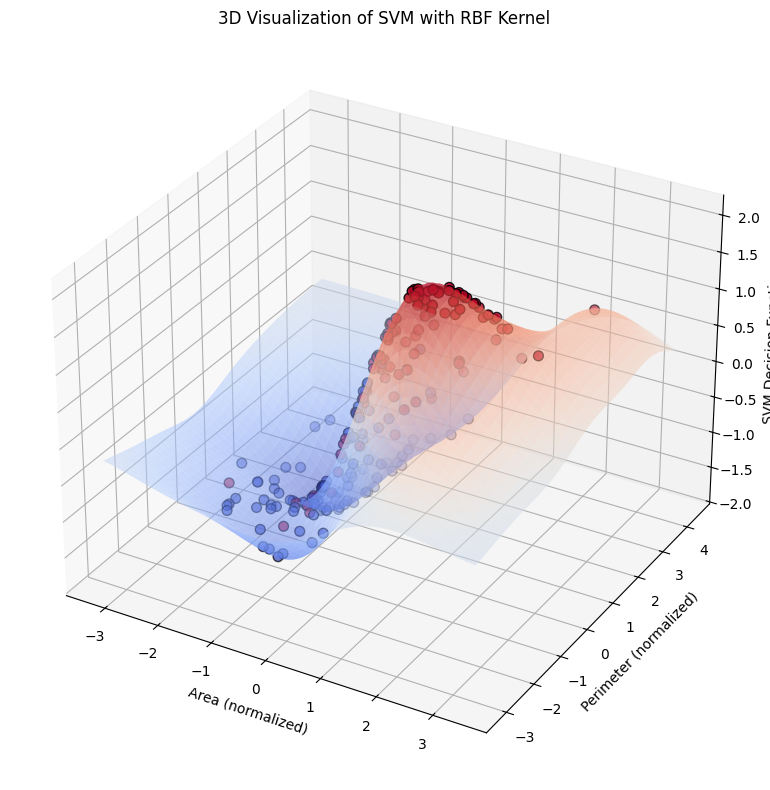

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Assume X = [[Area, Perimeter], ...] and y = [class labels]
# Load your real data here
# Example data:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X = StandardScaler().fit_transform(X)

# Train SVM with RBF kernel
clf = svm.SVC(kernel='rbf', C=1, gamma=0.5)
clf.fit(X, y)

# Create mesh grid
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100))

# Compute the decision function value for each grid point
zz = np.array([clf.decision_function([[x, y]])[0] for x, y in zip(xx.ravel(), yy.ravel())])
zz = zz.reshape(xx.shape)

# Plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface
ax.plot_surface(xx, yy, zz, cmap='coolwarm', alpha=0.5, linewidth=0)

# Scatter the actual data points
z_vals = clf.decision_function(X)
ax.scatter(X[:, 0], X[:, 1], z_vals, c=y, cmap='coolwarm', edgecolors='k', s=50)

# Labels
ax.set_xlabel('Area (normalized)')
ax.set_ylabel('Perimeter (normalized)')
ax.set_zlabel('SVM Decision Function')
ax.set_title('3D Visualization of SVM with RBF Kernel')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest with optimized parameters
clf = RandomForestClassifier(
    n_estimators=200,        # More trees
    max_depth=5,             # Limit tree depth
    min_samples_split=2,
    random_state=42
)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Sample prediction
sample_input = X_test[0].reshape(1, -1)
sample_true_label = y_test[0]
sample_pred_label = clf.predict(sample_input)[0]
sample_pred_proba = clf.predict_proba(sample_input)[0]

print("\n Sample Prediction")
print("Input Features:", sample_input[0])
print("True Class:", target_names[sample_true_label])
print("Predicted Class:", target_names[sample_pred_label])
print("Prediction Probabilities:")
for i, prob in enumerate(sample_pred_proba):
    print(f"  {target_names[i]}: {prob:.2f}")


--- Decision Function (f(x)) Equation ---
f(x) = Σ [αᵢ * exp(-γ * ||x - xᵢ||²)] + b
γ = 0.5
b = -0.1319

Support Vectors and αᵢ coefficients:
α[0] = -1.0000, x[0] = [-0.17089353 -0.47640495]
α[1] = -1.0000, x[1] = [-0.09326952 -1.41313063]
α[2] = -1.0000, x[2] = [-0.25695172  0.19649946]
α[3] = -0.2720, x[3] = [0.2497229  2.44247312]
α[4] = -0.9342, x[4] = [-2.24906671 -0.366065  ]
α[5] = -1.0000, x[5] = [ 0.23573561 -0.20536761]
α[6] = -0.8405, x[6] = [-1.75745228 -1.75730071]
α[7] = -1.0000, x[7] = [-0.02215076 -0.41177938]
α[8] = -1.0000, x[8] = [ 0.12067445 -0.75009319]
α[9] = -1.0000, x[9] = [-0.56644049 -0.51925829]
α[10] = -1.0000, x[10] = [0.15924095 0.07559578]
α[11] = -1.0000, x[11] = [ 0.20173244 -1.03304332]
α[12] = -1.0000, x[12] = [-0.39884163 -0.89532482]
α[13] = -1.0000, x[13] = [ 0.28690702 -0.9604253 ]
α[14] = -0.8777, x[14] = [-1.75503621 -1.47015833]
α[15] = -1.0000, x[15] = [-0.23261626  0.1251546 ]
α[16] = -1.0000, x[16] = [ 0.0354817  -1.77092969]
α[17] = -1.000

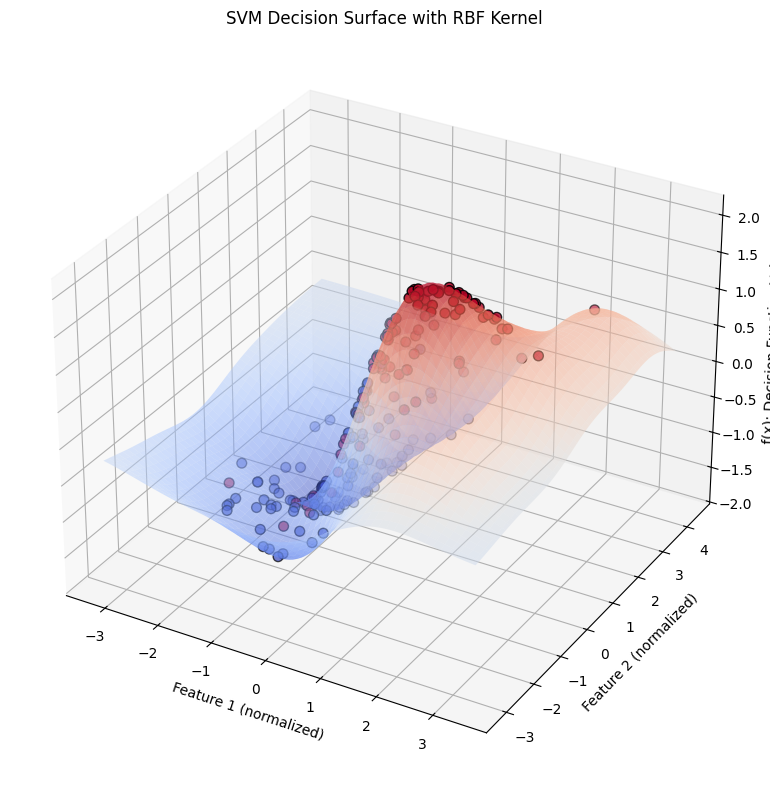

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Generate and normalize example data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)
X = StandardScaler().fit_transform(X)

# Train SVM with RBF kernel
gamma = 0.5
clf = svm.SVC(kernel='rbf', C=1, gamma=gamma)
clf.fit(X, y)

# Extract model parameters
support_vectors = clf.support_vectors_
dual_coefs = clf.dual_coef_[0]  # Shape: (n_support_vectors,)
intercept = clf.intercept_[0]

# Print out the actual decision function equation
print("\n--- Decision Function (f(x)) Equation ---")
print("f(x) = Σ [αᵢ * exp(-γ * ||x - xᵢ||²)] + b")
print(f"γ = {gamma}")
print(f"b = {intercept:.4f}")
print("\nSupport Vectors and αᵢ coefficients:")

for i, (alpha, vec) in enumerate(zip(dual_coefs, support_vectors)):
    print(f"α[{i}] = {alpha:.4f}, x[{i}] = {vec}")

# Create mesh grid
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Compute decision function for each point
def decision_function_rbf(x1, x2):
    z = np.zeros_like(x1)
    for alpha, sv in zip(dual_coefs, support_vectors):
        z += alpha * np.exp(-gamma * ((x1 - sv[0]) ** 2 + (x2 - sv[1]) ** 2))
    return z + intercept

zz = decision_function_rbf(xx, yy)

# Plot 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, cmap='coolwarm', alpha=0.5, linewidth=0)

# Actual points
z_vals = clf.decision_function(X)
ax.scatter(X[:, 0], X[:, 1], z_vals, c=y, cmap='coolwarm', edgecolors='k', s=50)

# Labels
ax.set_xlabel('Feature 1 (normalized)')
ax.set_ylabel('Feature 2 (normalized)')
ax.set_zlabel('f(x): Decision Function Value')
ax.set_title('SVM Decision Surface with RBF Kernel')

plt.tight_layout()
plt.show()
